In [ ]:
本程序提供标准的针对本次数据集的数据eda，请在本程序提供的接口下进行data analysis，不要重新创建新的ipdb程序(在本程序中完成分析工作)
训练集和测试集数据均以dataframe格式给出，pytorch自定义datasets类接受dataframe的索引以npy格式保存，分析后的分类型训练的索引需要在filter_dbz.py
中修改，这里只给出demo

In [77]:
#以下程序提供一个简单的数据 demo
import pandas as pd
train_pd = '/media/workdir/hujh/hujh-new/huaweirader_baseline/data_eda/train_all_pkl.pkl'
test_pd = '/media/workdir/hujh/hujh-new/huaweirader_baseline/data_eda/test_all_pkl.pkl'

train_df = pd.read_pickle(train_pd)
test_df = pd.read_pickle(test_pd)

In [78]:
#sample imformation excavate
print(train_df.shape)
print(train_df.head(10))
train_df.describe()
print("------------------------")
print(test_df.shape)
print(test_df.head(10))
test_df.describe()

(820000, 1)
                                               fname
0  /media/data/huaweiraderdata/train/train_all/RA...
1  /media/data/huaweiraderdata/train/train_all/RA...
2  /media/data/huaweiraderdata/train/train_all/RA...
3  /media/data/huaweiraderdata/train/train_all/RA...
4  /media/data/huaweiraderdata/train/train_all/RA...
5  /media/data/huaweiraderdata/train/train_all/RA...
6  /media/data/huaweiraderdata/train/train_all/RA...
7  /media/data/huaweiraderdata/train/train_all/RA...
8  /media/data/huaweiraderdata/train/train_all/RA...
9  /media/data/huaweiraderdata/train/train_all/RA...
------------------------
(63000, 1)
                                               fname
0  /media/data/huaweiraderdata/test/test_all/RAD_...
1  /media/data/huaweiraderdata/test/test_all/RAD_...
2  /media/data/huaweiraderdata/test/test_all/RAD_...
3  /media/data/huaweiraderdata/test/test_all/RAD_...
4  /media/data/huaweiraderdata/test/test_all/RAD_...
5  /media/data/huaweiraderdata/test/test_all/RAD_..

,fname
count,63000
unique,63000
top,/media/data/huaweiraderdata/test/test_all/RAD_...
freq,1


In [22]:
train_df.values[0]

array(['/media/data/huaweiraderdata/train/train_all/RAD_184392561770451/RAD_184392561770451_000.png'],
      dtype=object)

In [59]:
train_df['fname'].keys()[0][0]
len(test_df['fname'].keys()[62978:63000])

22

In [79]:
#二次检查排序方式
checkorigan_df = train_df
checksort_df = train_df.sort_values(by=['fname'])
assert (checkorigan_df.values == checksort_df .values).all()

In [80]:
#重新制索引用来聚类分析
train_index = list(map(lambda x:x[0].split('/')[-2],train_df.values))
train_df.index = [train_index,train_index]
train_df.index.names=['index0','index1']

test_index = list(map(lambda x:x[0].split('/')[-2],test_df.values))
test_df.index = [test_index,test_index]
test_df.index.names=['index0','index1']

In [122]:
#train_df.columns.levels  
x = list(train_df.index.get_level_values(0)[[bool(1-x) for x in train_df.index.duplicated(keep='first')]])
#train_df.index.values[0](train_df.index.duplicated(keep='first'))

In [128]:
xx = x[10]
#xx
train_df.loc[xx][:9:5]

,fname
index1,
RAD_186297441371301,/media/data/huaweiraderdata/train/train_all/RA...
RAD_186297441371301,/media/data/huaweiraderdata/train/train_all/RA...


In [113]:
x = [True,False]
x = [bool(1-xx) for xx in x]
x

[False, True]

In [81]:
#三次检查每一组样本是否都是41个文件，不是则drop
df = train_df.groupby(['index1']).describe().reset_index()
df[df['fname']['count'].values != 41].index
df.loc[lambda df: df['fname']['count'].values != 41, :]
#说明本次数据集无缺失文件

Empty DataFrame
Columns: [(index1, ), (fname, count), (fname, unique), (fname, top), (fname, freq)]
Index: []

In [64]:
#下面给出最简单的返回训练索引的demo，这个函数封装在filter_dbz中，数据eda需要分析后对返回的训练数据索引进行分类或者其他操作，分析后对
#对filter_dbz类的方法进行扩充，这里只给出最简单的demo---即不进行数据分型所有样本均参与训练
#即用前两个小时的数据预测后两个小时，input的长度为10间隔为12分钟，所以每个样本只返回初始时刻的下标索引t0
#整个样本seq input(t0，t0+12,t0+24,...t0+120),target(t0+150min,t0+180min,t0+220min,t0+240min)的加载在datasets.py中进行
from pathos.multiprocessing import ProcessingPool as Pool
#字符串--》41个样本对应的序号范围0-40
def splitstr_int(var):
    if var[0].split('/')[-1].split('.')[0][-2] == 0:
        var = int(var[0].split('/')[-1].split('.')[0][-1:])
    else:
        var = int(var[0].split('/')[-1].split('.')[0][-2:])
    return var
train_number_list = list(map(splitstr_int,train_df.values))
test_number_list = list(map(splitstr_int,test_df.values))
#因为一个训练样本包含41个图片时长为4h，考虑到一个seq就需要4h所以无法在样本内进行滑窗切割数据集，只需要返回初始下标即可，即x[1]==0
train_number_list = list(filter(lambda x:x[1]==0,enumerate(train_number_list)))
test_number_list = list(filter(lambda x:x[1]==0,enumerate(test_number_list)))
print(len(train_number_list))
print(len(test_number_list))






20000
3000


In [71]:
test_number_list[-1]

(62979, 0)

In [2]:
import numpy as np
x = 4
y =np.array([1,2,3])
if x in y :
    print(x)

In [9]:
xx= np.load('/media/workdir/hujh/hujh-new/huaweirader_baseline/data_eda/hard_train_demo.npy',allow_pickle=True)
xx.shape

(20000,)

In [30]:
x = np.array([None,1,3,None])
w = x.tolist()
z = np.array(list(filter(lambda x:x != None, w)))
z

array([1, 3])

In [140]:
import numpy as np
x = np.random.rand(1,1,2,2)
z = np.ones_like(x)
x = z.sum()
w =[1,2,3]
w = np.array(w).max()
w

3

In [160]:
import numpy as np 
import PIL.Image as Image
import os
def makefeatrue(tid,pkl_path='/media/workdir/hujh/hujh-new/huaweirader_baseline/data_eda/train_all_pkl.pkl',save='/media/workdir/hujh/hujh-new/huaweirader_baseline/data_eda/train_distribute.npy'):
    """
    reutrn[seq_dbz_mean,seqmax,seqmin,seqfinally-seqbegin,target_seq_mean]
    """
    tid = tid
    print(tid)
    df = pd.read_pickle(pkl_path)
    rootdir = ''
    seq_mean = []
    target_seq_mean = []
    for time in range(tid,tid+22,2):
        frame = np.array(Image.open(df['fname'][time]))
        temp = frame.sum()
        if time == tid:
            seq_begin = temp
        if time ==tid+20:
            seq_finally = temp
        seq_mean.append(temp)
    for time in range(tid+25,tid+45,5):
        frame = np.array(Image.open(df['fname'][time]))
        target_seq_mean.append(frame)
    seq_max = np.array(seq_mean).max()
    seq_min = np.array(seq_mean).min()
    seq_mean = np.array(seq_mean).mean()
    anomaly = seq_finally - seq_begin
    target_seq_mean = np.array(target_seq_mean).mean()
    return np.array([seq_mean,seq_max,seq_min,anomaly,target_seq_mean])
        
        
    
    

In [ ]:
#下面给出一种筛选研究的方法demo即我只筛选20dbz回波面积占1/3以上的样本作为classfiy1（中等回波强度过程），即数据分析分型后在这个方法里修改
#判定条件，作为classfiy的数据集训练对应模型在inference的时候判断从而选择何种classfiy模型
import PIL.Image as Image
import numpy as np
from pathos.multiprocessing import ProcessingPool as Pool
import pandas as pd
import os
def filter_hard(tid):
    df = pd.read_pickle('/media/workdir/hujh/hujh-new/huaweirader_baseline/data_eda/train_all_pkl.pkl')
    tid = tid
    print(tid)
    seq_mean = []
    for time in range(tid+1,tid+20,2):
        frame = np.array(Image.open(df['fname'][time]))
        #缺测值为255我是直接将其滤成0不知道有没有其他好一点的办法，或者random一个0-80dbz的数值
        temp = frame.sum()
        frame[frame>=85.5] = 0
        seq_mean.append(temp/(np.sum(frame>0.0000001)))
    #print(frame)
    """
    for time in range(tid+1,tid+20,2):
    count  = (frame > 20)
    #print(self.threshold)
    counts = np.logical_and(count,True).sum()
    print(tid,'is processing')
    if counts >=self.area:
        x = tid
    else:
        x= None
    """
    seq_mean = np.array(seq_mean).mean()
    if seq_mean >=15:
        return tid
    

#demo不进行任何操作直接返回
def demo_pic(tid):
    return tid[0]
test_number_listx = np.load('/media/workdir/hujh/hujh-new/huaweirader_baseline/data_eda/train_demo.npy')
test_number_list = test_number_listx.tolist()
with Pool(8) as p:
    #train_list=list(p.map(demo_pic,train_number_list))
    test_list = list(p.map(filter_hard,test_number_list))
#train_list = np.array(train_list)
print("fuck")
test_list  = np.array(test_list)
#这样返回的索引就是筛选过后的
#index_list = list(filter(lambda x:x!=None,x))
#train_savepath = '/media/workdir/hujh/hujh-new/huaweirader_baseline/data_eda/train_demo.npy'
test_savepath = '/media/workdir/hujh/hujh-new/huaweirader_baseline/data_eda/hard_train_demo.npy'
#save = np.save(train_savepath,train_list)
save = np.save(test_savepath,test_list)

In [ ]:
x =1
x

In [249]:
test_number_list = np.load('/media/workdir/hujh/hujh-new/huaweirader_baseline/data_eda/train_demo.npy')
test_number_list.shape

(20000,)

In [39]:
import imageio
im = imageio.imread('/media/data/huaweiraderdata/train/train_all/RAD_184392561770451/RAD_184392561770451_000.png')

In [44]:
im.shape
im.max()

50

In [1]:
import numpy as np
x = np.load('/media/workdir/hujh/hujh-new/huaweirader_baseline/data_eda/train_demo.npy')

In [2]:
x = list(x)

In [ ]:
from pathos.multiprocessing import ProcessingPool as Pool
import numpy as np
import os
with Pool(8) as p:
    #train_list=list(p.map(demo_pic,train_number_list))
    test_list = list(p.map(makefeatrue,x))
test_list = np.array(test_list)
np.save('/media/workdir/hujh/hujh-new/huaweirader_baseline/data_eda/train_distrubute.npy')


In [4]:
import numpy as np
x = np.load('/media/workdir/hujh/hujh-new/huaweirader_baseline/data_eda/train_distrubute.npy')

In [7]:
x.shape
x[:,0]

0.0

(array([3.314e+03, 5.926e+03, 4.486e+03, 2.965e+03, 1.725e+03, 8.950e+02,
        4.400e+02, 1.910e+02, 5.300e+01, 5.000e+00]),
 array([      0.        ,  216289.63636364,  432579.27272727,
         648868.90909091,  865158.54545455, 1081448.18181818,
        1297737.81818182, 1514027.45454545, 1730317.09090909,
        1946606.72727273, 2162896.36363636]),
 <a list of 10 Patch objects>)

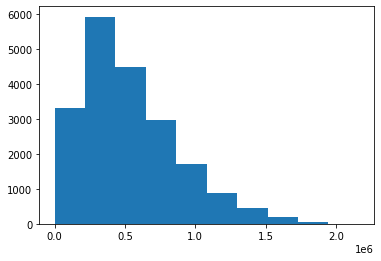

In [8]:
import matplotlib.pyplot as plt
plt.hist(x[:,0])


(array([4.000e+00, 1.000e+01, 9.600e+01, 2.778e+03, 1.574e+04, 1.316e+03,
        5.000e+01, 5.000e+00, 0.000e+00, 1.000e+00]),
 array([-1825034. , -1389716.1,  -954398.2,  -519080.3,   -83762.4,
          351555.5,   786873.4,  1222191.3,  1657509.2,  2092827.1,
         2528145. ]),
 <a list of 10 Patch objects>)

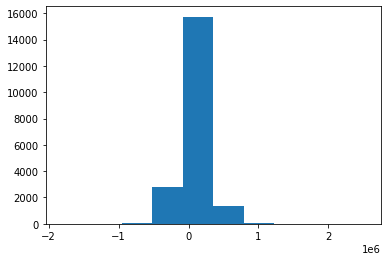

In [25]:
import sns
#sns.distplot(list(x[:,3]))
plt.hist(x[:,3])

(array([2630., 5062., 4453., 3180., 2131., 1299.,  729.,  350.,  130.,
          36.]),
 array([ 0.        ,  3.1185791 ,  6.2371582 ,  9.3557373 , 12.47431641,
        15.59289551, 18.71147461, 21.83005371, 24.94863281, 28.06721191,
        31.18579102]),
 <a list of 10 Patch objects>)

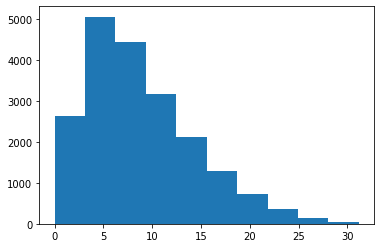

In [26]:
plt.hist(x[:,4])

In [12]:
y = np.load('/media/workdir/hujh/hujh-new/huaweirader_baseline/data_eda/test_distrubute.npy')

In [13]:
y.shape

(3000, 4)

In [22]:
feature = y[:,0]
len(feature[feature<500000])

1735

(array([570., 887., 670., 391., 256., 118.,  52.,  32.,  16.,   8.]),
 array([   3544.90909091,  213490.4       ,  423435.89090909,
         633381.38181818,  843326.87272727, 1053272.36363636,
        1263217.85454545, 1473163.34545455, 1683108.83636364,
        1893054.32727273, 2102999.81818182]),
 <a list of 10 Patch objects>)

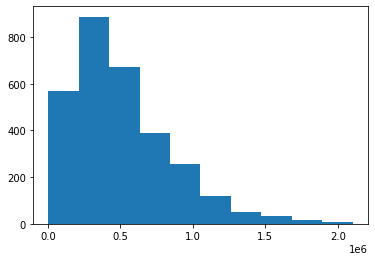

In [14]:
plt.hist(y[:,0])

(array([5.000e+00, 1.500e+01, 3.800e+01, 3.530e+02, 2.076e+03, 4.480e+02,
        3.900e+01, 2.100e+01, 2.000e+00, 3.000e+00]),
 array([-1306801. , -1005180.7,  -703560.4,  -401940.1,  -100319.8,
          201300.5,   502920.8,   804541.1,  1106161.4,  1407781.7,
         1709402. ]),
 <a list of 10 Patch objects>)

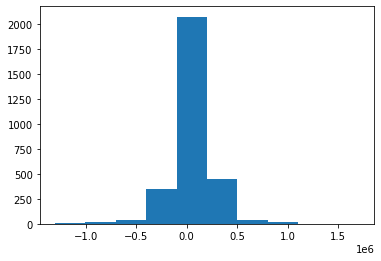

In [27]:
plt.hist(y[:,3])#减弱还是增强

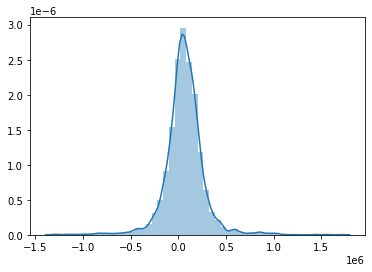

In [41]:
import seaborn as sns
sns.distplot(list(y[:,3]))

In [68]:
import pandas as pd
df_train = pd.DataFrame(x)

In [72]:
y = np.load('/media/workdir/hujh/hujh-new/huaweirader_baseline/data_eda/test_distrubute.npy')
df_test = pd.DataFrame(y)

In [71]:
y.shape

(20000, 1)

In [73]:
df_test.columns = ['seq_mean','seqmax','seqmin','seq_anomaly']
df_test.index.name='smaples'

In [44]:
df_train.columns = ['seq_mean','seqmax','seqmin','seq_anomaly','target_mean']
df_train.index.name='smaples'

In [37]:
df_train.to_csv('/media/workdir/hujh/hujh-new/huaweirader_baseline/data_eda/train_frature.csv')

In [51]:
data = df_train[['seq_mean','seqmax','seqmin','seq_anomaly','target_mean']]

In [52]:
feature = ['seq_mean','seqmax','seqmin','seq_anomaly','target_mean']
#data = df_train[featrue]
corr = data.corr()
print(corr['target_mean'].sort_values(ascending = False),'\n')

target_mean    1.000000
seqmax         0.889915
seq_mean       0.870823
seqmin         0.764262
seq_anomaly    0.384875
Name: target_mean, dtype: float64 



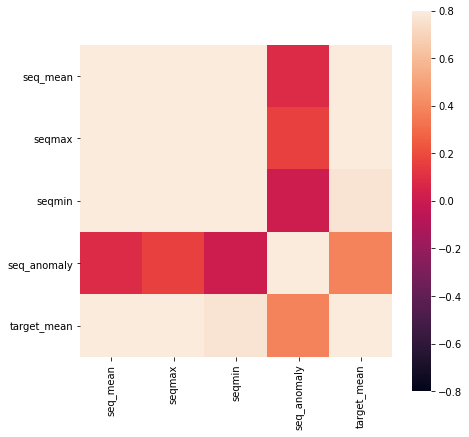

In [54]:
f , ax = plt.subplots(figsize = (7, 7))
sns.heatmap(corr,square = True, vmax=0.8,vmin=-0.8)
#这就证明其他几个特征都是无用特征只靠seq_mean就能判断target的强弱那么可以分成四类
# 强+变强，强+变弱，弱+变强，弱+变弱
#先尝试分成2类

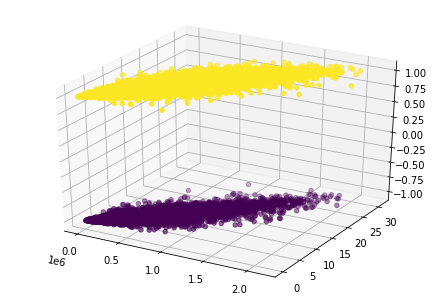

In [60]:
from mpl_toolkits.mplot3d import Axes3D  
seqmean = x[:,0]
target = x[:,4]
anomly = x[:,3]
color = anomly
color[color>=0]=1
color[color<0]=-1
fig = plt.figure()

ax = Axes3D(fig)

ax.scatter(seqmean,anomly,c=color)

#plt.scatter(seqmean,target,anomly)

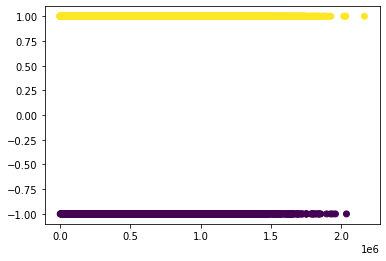

In [61]:
plt.scatter(seqmean,anomly,c=color)

In [67]:
# coding: utf-8
# pylint: disable = invalid-name, C0111
import lightgbm as lgb
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split 

print('Loading data...')
# load or create your dataset

x = df_train[['seq_mean','seqmax','seqmin','seq_anomaly']].values
y = df_train[['target_mean']]
print(y.shape)


x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)
# create dataset for lightgbm
print(y_train.shape)
lgb_train = lgb.Dataset(x_train, y_train)
lgb_eval = lgb.Dataset(x_test, y_test, reference=lgb_train)

# specify your configurations as a dict
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=100,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)

print('Saving model...')
# save model to file
#gbm.save_model('model.txt')

print('Starting predicting...')
# predict
y_pred = gbm.predict(x_test, num_iteration=gbm.best_iteration)
# eval
print('The rmse of prediction is:', mean_squared_error(y_test, y_pred) ** 0.5)



Loading data...
(20000, 1)
(14000, 1)
Starting training...
[1]	valid_0's l1: 4.24846	valid_0's l2: 27.3373
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 4.07065	valid_0's l2: 25.0929
[3]	valid_0's l1: 3.91409	valid_0's l2: 23.191
[4]	valid_0's l1: 3.75518	valid_0's l2: 21.353
[5]	valid_0's l1: 3.60589	valid_0's l2: 19.6894
[6]	valid_0's l1: 3.47167	valid_0's l2: 18.2616
[7]	valid_0's l1: 3.34602	valid_0's l2: 16.9705
[8]	valid_0's l1: 3.21998	valid_0's l2: 15.7286
[9]	valid_0's l1: 3.10115	valid_0's l2: 14.6086
[10]	valid_0's l1: 2.98905	valid_0's l2: 13.5935
[11]	valid_0's l1: 2.88424	valid_0's l2: 12.6792
[12]	valid_0's l1: 2.78622	valid_0's l2: 11.8549
[13]	valid_0's l1: 2.70132	valid_0's l2: 11.1557
[14]	valid_0's l1: 2.62034	valid_0's l2: 10.5187
[15]	valid_0's l1: 2.53966	valid_0's l2: 9.90383
[16]	valid_0's l1: 2.46946	valid_0's l2: 9.3794
[17]	valid_0's l1: 2.3974	valid_0's l2: 8.86402
[18]	valid_0's l1: 2.33501	valid_0's l2: 8.43475
[19]	valid_

In [74]:
x = df_test[['seq_mean','seqmax','seqmin','seq_anomaly']].values
y_test = gbm.predict(x, num_iteration=gbm.best_iteration)

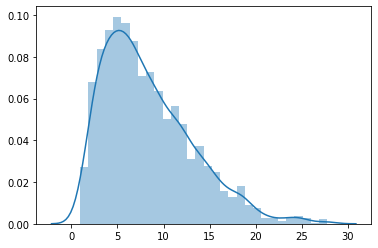

In [76]:
import seaborn as sns
sns.distplot(list(y_test))

In [14]:
import numpy as np
list_x = np.load('/media/workdir/hujh/hujh-new/huaweirader_baseline/data_eda/train_distrubute.npy')

In [15]:
list_x.shape

(20000, 8)

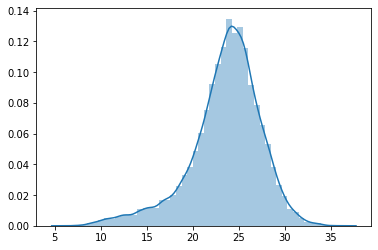

In [16]:
import seaborn as sns
sns.distplot(list_x[:,0])

In [21]:
sum(list_x[:,0]<24)

9685

In [231]:
df_test = pd.DataFrame(list_x)

df_test.columns = ['seq_mean','seqmax','seqmin','seq_anomaly','seq_begin','finally','count','target_mean']
df_test.index.name='smaples'
#print(df_test)
data = df_test[['seq_mean','seqmax','seqmin','seq_anomaly','seq_begin','finally','count','target_mean']]
print(data)
#data = df_train[featrue]
corr = data.corr()
print(corr['target_mean'].sort_values(ascending = False),'\n')

          seq_mean     seqmax     seqmin  seq_anomaly  seq_begin   finally  \
smaples                                                                      
0        23.478215  24.107222  20.764782    -113402.0   664421.0  551019.0   
1        23.795250  24.877357  23.329218      75447.0   634497.0  709944.0   
2        27.273741  28.449355  25.817926    -380062.0  1025457.0  645395.0   
3        28.832487  29.407448  28.006617     175746.0   634854.0  810600.0   
4        24.514298  25.262732  23.749058     266200.0   277199.0  543399.0   
...            ...        ...        ...          ...        ...       ...   
19995    21.853848  22.403585  20.891716      37409.0   310456.0  347865.0   
19996    18.602619  22.822898  15.260179     -29144.0   105692.0   76548.0   
19997    19.959620  21.161697  18.173724      29022.0    97915.0  126937.0   
19998    25.731273  26.259009  25.458594     360292.0   556691.0  916983.0   
19999    24.291199  28.728805  20.430514      94372.0   724483.0

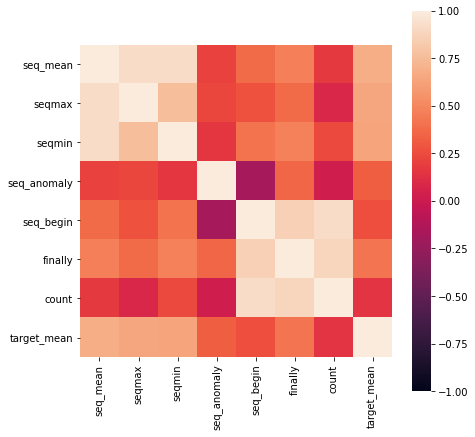

In [232]:
f , ax = plt.subplots(figsize = (7, 7))
sns.heatmap(corr,square = True, vmax=1,vmin=-1)

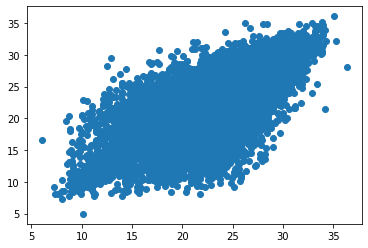

In [201]:

seqmean = list_x[:,0]
target = list_x[:,7]
anomly = list_x[:,3]
begin = list_x[:,4]
plt.scatter(seqmean,target)

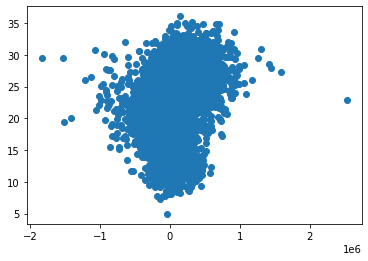

In [99]:
plt.scatter(anomly,target)

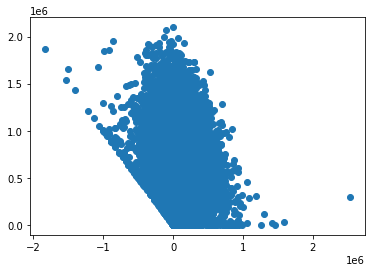

In [108]:
plt.scatter(anomly,begin)

In [ ]:
new_feature = np.concatenate((list_x[:,4][:,np.newaxis],list_x[:,3][:,np.newaxis]),axis =1)
new_feature.shape

In [222]:
import math

import pyecharts.options as opts
from pyecharts.charts import Line3D

week_en = "Saturday Friday Thursday Wednesday Tuesday Monday Sunday".split()
clock = (
    "12a 1a 2a 3a 4a 5a 6a 7a 8a 9a 10a 11a 12p "
    "1p 2p 3p 4p 5p 6p 7p 8p 9p 10p 11p".split()
)

data = []
for t in range(0, 25000):
    _t = t / 1000
    x = (1 + 0.25 * math.cos(75 * _t)) * math.cos(_t)
    y = (1 + 0.25 * math.cos(75 * _t)) * math.sin(_t)
    z = _t + 2.0 * math.sin(75 * _t)
    data.append([x, y, z])

(
    Line3D()
    .add(
        "",
        data,
        xaxis3d_opts=opts.Axis3DOpts(data=clock, type_="value"),
        yaxis3d_opts=opts.Axis3DOpts(data=week_en, type_="value"),
        grid3d_opts=opts.Grid3DOpts(width=100, height=100, depth=100),
    )
    .set_global_opts(
        visualmap_opts=opts.VisualMapOpts(
            dimension=2,
            max_=30,
            min_=0,
            range_color=[
                "#313695",
                "#4575b4",
                "#74add1",
                "#abd9e9",
                "#e0f3f8",
                "#ffffbf",
                "#fee090",
                "#fdae61",
                "#f46d43",
                "#d73027",
                "#a50026",
            ],
        )
    )
    .render("line3d_rectangular_projection.html")
)


'/media/workdir/hujh/hujh-new/huaweirader_baseline/data_eda/line3d_rectangular_projection.html'

In [ ]:
x = list_x[:,4].unsqueeze(1)

In [107]:
new_feature = np.concatenate((list_x[:,4][:,np.newaxis],list_x[:,3][:,np.newaxis]),axis =1)
new_feature.shape

(20000, 2)

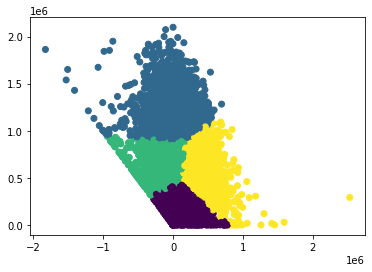

In [116]:
import numpy as np
import matplotlib.pyplot as plt
#matplotlib inline
from sklearn import metrics
#from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
y_pred = KMeans(n_clusters=4, random_state=9).fit_predict(new_feature)
plt.scatter(new_feature[:,1], new_feature[:,0], c=y_pred)
plt.show()
#print(metrics.calinski_harabaz_score(X, y_pred))
#用Calinski-Harabasz Index评估四分类的聚类分数







In [113]:
import sklearn
print("Sklearn verion is {}".format(sklearn.__version__))

Sklearn verion is 0.22


In [225]:
import math

from pyecharts import options as opts
from pyecharts.charts import Line3D
from pyecharts.faker import Faker

data = [x_test1[:,0],x_test1[:,6],y_test1[:,0]]
"""
for t in range(0, 25000):
    _t = t / 1000
    x = (1 + 0.25 * math.cos(75 * _t)) * math.cos(_t)
    y = (1 + 0.25 * math.cos(75 * _t)) * math.sin(_t)
    z = _t + 2.0 * math.sin(75 * _t)
    data.append([x, y, z])
"""
c = (
    Line3D()
    .add(
        "",
        data,
        xaxis3d_opts=opts.Axis3DOpts(Faker.clock, type_="value"),
        yaxis3d_opts=opts.Axis3DOpts(Faker.week_en, type_="value"),
        grid3d_opts=opts.Grid3DOpts(
            width=100, depth=100, rotate_speed=150, is_rotate=True
        ),
    )
    .set_global_opts(
        visualmap_opts=opts.VisualMapOpts(
            max_=30, min_=0, range_color=Faker.visual_color
        ),
        title_opts=opts.TitleOpts(title="Line3D-旋转的弹簧"),
    )
    .render("line3d_autorotate.html")
)


IndexError: index 6 is out of bounds for axis 1 with size 5

In [119]:
x = np.array([[0,1],[0,0]])
y = np.sum(x==0)

In [120]:
y

3

In [121]:
x = np.load('/media/workdir/hujh/hujh-new/huaweirader_baseline/data_eda/train_demo.npy')

In [122]:
x

array([     0,     41,     82, ..., 819877, 819918, 819959])

In [233]:
df_test.dropna(inplace=True)
print(np.isnan(df_test).any())


seq_mean       False
seqmax         False
seqmin         False
seq_anomaly    False
seq_begin      False
finally        False
count          False
target_mean    False
dtype: bool


In [234]:
import lightgbm as lgb
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split 

print('Loading data...')
# load or create your dataset

x = df_test[['seq_mean','seq_anomaly','seq_begin','finally','count']]
y = df_test[['target_mean']]
print(y.shape)


x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)
# create dataset for lightgbm
print(y_train.shape)
lgb_train = lgb.Dataset(x_train, y_train)
lgb_eval = lgb.Dataset(x_test, y_test, reference=lgb_train)

# specify your configurations as a dict
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'num_leaves': 50,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=300,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)

print('Saving model...')
# save model to file
#gbm.save_model('model.txt')

print('Starting predicting...')
# predict
y_pred = gbm.predict(x_test, num_iteration=gbm.best_iteration)
# eval
print('The rmse of prediction is:', mean_squared_error(y_test, y_pred) ** 0.5)

Loading data...
(19279, 1)
(13495, 1)
Starting training...
[1]	valid_0's l1: 3.10243	valid_0's l2: 16.5887
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 3.02889	valid_0's l2: 15.8105
[3]	valid_0's l1: 2.96348	valid_0's l2: 15.133
[4]	valid_0's l1: 2.90306	valid_0's l2: 14.5182
[5]	valid_0's l1: 2.84684	valid_0's l2: 13.9579
[6]	valid_0's l1: 2.79086	valid_0's l2: 13.4209
[7]	valid_0's l1: 2.73945	valid_0's l2: 12.9336
[8]	valid_0's l1: 2.69455	valid_0's l2: 12.513
[9]	valid_0's l1: 2.65872	valid_0's l2: 12.1828
[10]	valid_0's l1: 2.61689	valid_0's l2: 11.8036
[11]	valid_0's l1: 2.57959	valid_0's l2: 11.4783
[12]	valid_0's l1: 2.54331	valid_0's l2: 11.1684
[13]	valid_0's l1: 2.51168	valid_0's l2: 10.9025
[14]	valid_0's l1: 2.48249	valid_0's l2: 10.6597
[15]	valid_0's l1: 2.45363	valid_0's l2: 10.4285
[16]	valid_0's l1: 2.42858	valid_0's l2: 10.2232
[17]	valid_0's l1: 2.4043	valid_0's l2: 10.0271
[18]	valid_0's l1: 2.38203	valid_0's l2: 9.85133
[19]	valid

In [235]:
y_test

,target_mean
smaples,
9515,23.469139
3164,24.690671
2064,26.542023
1038,12.708922
12177,24.109357
...,...
10214,24.339821
17028,8.386003
14486,20.619666


In [13]:
x_train.shape

NameError: name 'x_train' is not defined

(5784, 5)
(5784, 1)


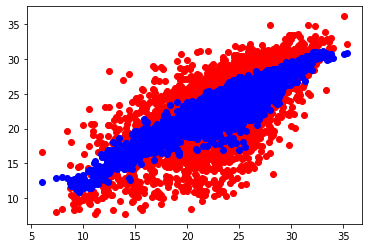

In [244]:
x_test1 = x_test.values
y_test1 = y_test.values
y_pred1 = y_pred
#print(y_pred1.type)
print(x_test1.shape)
print(y_test1.shape)
#ypred = list(y_pred1.values)
#plt.scatter(x_test1[:,0], ypred, c=1)
c= y_test1.copy()
c[:,0]=2
c1 = c.copy()
c1[:,0]=-10

plt.scatter(x_test1[:,0], y_test1[:,0], c='r')
plt.scatter(x_test1[:,0], y_pred[:], c='b')
#plt.scatter(x_test1[10:100,0], y_pred[:], c=c1)
plt.show()


In [237]:
from sklearn import svm
clf = svm.SVR()
clf.fit(x_train, y_train)

/usr/hujh/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  Returns


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [238]:
pred_y = clf.predict(x_test)


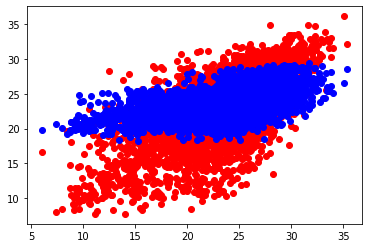

In [239]:
plt.scatter(x_test1[:,0], y_test1[:,0], c='r')
plt.scatter(x_test1[:,0], pred_y[:], c='b')
#plt.scatter(x_test1[10:100,0], y_pred[:], c=c1)
plt.show()

In [228]:
x_test1.shape

(5784, 5)

In [240]:
import math

from pyecharts import options as opts
from pyecharts.charts import Line3D
from pyecharts.faker import Faker

data = [x_test1[:,0],x_test1[:,4],y_test1[:,0]]
"""
for t in range(0, 25000):
    _t = t / 1000
    x = (1 + 0.25 * math.cos(75 * _t)) * math.cos(_t)
    y = (1 + 0.25 * math.cos(75 * _t)) * math.sin(_t)
    z = _t + 2.0 * math.sin(75 * _t)
    data.append([x, y, z])
"""
c = (
    Line3D()
    .add(
        "",
        data,
        xaxis3d_opts=opts.Axis3DOpts(Faker.clock, type_="value"),
        yaxis3d_opts=opts.Axis3DOpts(Faker.week_en, type_="value"),
        grid3d_opts=opts.Grid3DOpts(
            width=100, depth=100, rotate_speed=150, is_rotate=True
        ),
    )
    .set_global_opts(
        visualmap_opts=opts.VisualMapOpts(
            max_=30, min_=0, range_color=Faker.visual_color
        ),
        title_opts=opts.TitleOpts(title="Line3D-旋转的弹簧"),
    )
    .render("line3d_autorotate.html")
)


In [ ]:
from mpl_toolkits.mplot3d import Axes3D  
seqmean = x[:,0]
target = x[:,4]
anomly = x[:,3]
color = anomly
color[color>=0]=1
color[color<0]=-1
fig = plt.figure()

ax = Axes3D(fig)

ax.scatter(seqmean,anomly,c=color)

In [35]:
import numpy as np 
hard = np.load('/media/workdir/hujh/hujh-new/huaweirader_baseline/data_eda/hard_train_demo.npy',allow_pickle=True)
lst= hard.tolist()
hardnew = np.array(list(filter(lambda x:x != None, lst)))


In [42]:
puretrain = np.load('/media/workdir/hujh/hujh-new/huaweirader_baseline/data_eda/train_all_list.npy')
oldtrain =  np.load('/media/workdir/hujh/hujh-new/huaweirader_baseline/data_eda/train_demo.npy')

In [52]:
fuck = np.setdiff1d(oldtrain,puretrain,assume_unique=True)

In [55]:
hardsave = np.setdiff1d(hardnew,fuck,assume_unique=True)

In [56]:
hardsave.shape

(9592,)

In [57]:
hardnew.shape

(9855,)

In [58]:
np.save('/media/workdir/hujh/hujh-new/huaweirader_baseline/data_eda/newhard_train.npy',hardsave)

In [60]:
newhard = np.load('/media/workdir/hujh/hujh-new/huaweirader_baseline/data_eda/newhard_train.npy')

In [61]:
puretrain = np.load('/media/workdir/hujh/hujh-new/huaweirader_baseline/data_eda/train_all_list.npy')

In [62]:
neweak = np.setdiff1d(puretrain,newhard,assume_unique=True)

In [66]:
np.save('/media/workdir/hujh/hujh-new/huaweirader_baseline/data_eda/newweak_train.npy',neweak)

(19279,)

In [67]:
import torch 
x = torch.randn(1,4,4)

In [69]:
w = x.mean()

In [70]:
w

tensor(-0.0059)